## An overview of mine-induced earthquakes in the Orkney region, South Africa, and their effects on groundwater levels </b>

<b> By Ihomon Msugh-Aondo Ireanus </b>

South Africa is not only popular for her Diamonds from the Bushveld Igneous complex, but the Witwatersrand Basin in South Africa has been the source of about one third to one half of the gold ever produced in the world. These, and other natural resources have been mined over the years, creating a means of livlihood to the miners, and boost in the country's economy, but the mining of these resources also lead to mining and environmental hazards. As a country on the stable African tectonic plate, most of the seismic activities in the country are due to human activities, with an example being the 5.5 magnitude Orkney earthquake caused by the collapse of a gold mine. This led to the death of a miner, sustained injuries by several others and destruction of about 600 homes. There have been sevaral earthquakes around this mining region, but this was the seismic activity with the highest magnitude.

<img src=https://upload.wikimedia.org/wikipedia/commons/b/bb/ShakeMap_Orkney_5_August_2014.jpg >

In [1]:
!pip install obspy

The code below imports the necessary python libraries

In [2]:
# Obspy is a python library that enables reading, processing, and analysis of seismic data and waveforms
import obspy

# UTCDateTime allows effective handling of UTC timestamps
from obspy import UTCDateTime

# Client enables us to query and download seismic data from FDSN (Federation of Digital Seismograph Networks)
# Client is set to IRIS data center, a repository for global seismic data
from obspy.clients.fdsn import Client
client = Client("IRIS")

# pyplot generates quality plots, charts, and figures
import matplotlib.pyplot as plt
# mdates handles date and time formatting on plot axes
import matplotlib.dates as mdates

# pandas enables handling and creation of structured (tabular) data, such as Excel files
import pandas as pd
# numpy provides mathematical functions for numerical calculations
import numpy as np

# seaborn enhances visualizations
import seaborn as sns

# Axes3D from matplotlib toolkits enables the creation of plots in 3 dimensions
from mpl_toolkits.mplot3d import Axes3D

# To create intervals in the axis tick marks
from matplotlib.ticker import MultipleLocator


In [3]:
# Setting the time duration for seismic events from 2005 to 2025 
startt = UTCDateTime("2005-08-05")
endt = UTCDateTime("2025-08-05")

# Setting coordinates to Orkney, South Africa
lon = 26.7094
lat = -26.9717

# setting location of seismic events to within 1° (approx. 111km) of the center point
maxrad = 1.0

# I am only interested in seismic activity with a magnitude of 3 and above
minmag = 3.0

In [4]:
# obtaining events that occurred within that time range
orkney_catalogue = client.get_events(starttime=startt, endtime=endt,
                        latitude=lat, longitude=lon, 
                        maxradius=maxrad, minmagnitude = minmag,
                        catalog="ISC")

In [5]:
print(orkney_catalogue)

544 Event(s) in Catalog:
2015-08-23T10:32:49.400000Z | -26.411,  +27.398 | 3.0  ML
2015-08-03T23:47:18.260000Z | -27.040,  +26.816 | 3.6  mb
...
2005-08-11T07:08:34.900000Z | -27.913,  +26.681 | 3.1  ML
2005-08-05T19:00:00.600000Z | -26.341,  +27.540 | 3.0  ML
To see all events call 'print(CatalogObject.__str__(print_all=True))'


A total of 544 earthquake events with magnitudes of 3 and above occurred within the area of interest, but only data from 2005 to 2015 is available.

In [6]:
# getting earthquake occurrence time (times), magnitudes, and depth of occurrence
times = []
mags = []
depth = []
for event in orkney_catalogue:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
    depth.append(event.origins[0].depth/1000)
mtimes = mdates.date2num(times)

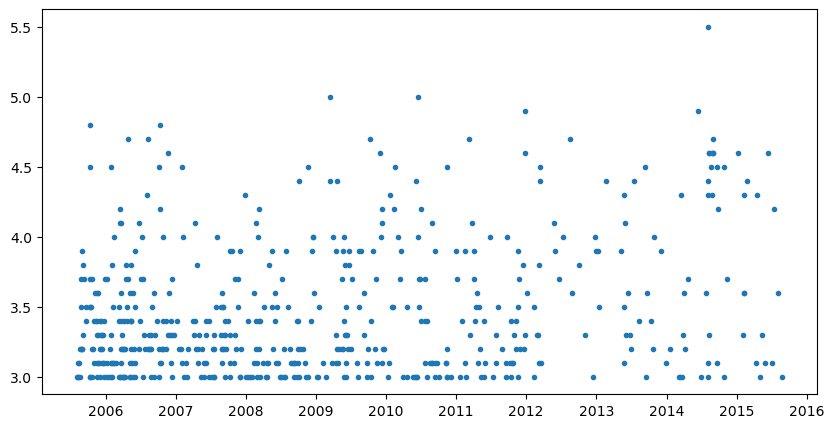

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.scatter(mtimes, mags, marker='.')

# Setting the major ticks to an interval of 1 year
ax.xaxis.set_major_locator(mdates.YearLocator())

# setting the ticks to show each year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

In [8]:
# The code below extracts various parameters of interest from the Orkney earthquake catalogue, and arranges them in a dataframe
year = []
month = []
day = []
hour = []
minute = []
second = []
lat = []
long = []
mag = []

for event in orkney_catalogue:
    year.append(event.origins[0].time.year)
    month.append(event.origins[0].time.month)
    day.append(event.origins[0].time.day)
    hour.append(event.origins[0].time.hour)
    minute.append(event.origins[0].time.minute)
    second.append(event.origins[0].time.second)
    lat.append(event.origins[0].latitude)
    long.append(event.origins[0].longitude)
    mag.append(event.magnitudes[0].mag)

orkney_df = pd.DataFrame(np.array([year, month, day, hour, minute, second, lat, long, depth, mag]).T,
columns=["Year", "month", "day", "hour", "minute", "second","lat", "long", "depth (Km)", "mag"])


In [9]:
print(orkney_df.head())

     Year  month   day  hour  minute  second      lat     long  depth (Km)  \
0  2015.0    8.0  23.0  10.0    32.0    49.0 -26.4110  27.3980         2.0   
1  2015.0    8.0   3.0  23.0    47.0    18.0 -27.0403  26.8164         9.3   
2  2015.0    7.0  12.0  15.0    38.0    55.0 -26.4556  27.5166         3.7   
3  2015.0    7.0   2.0   5.0    20.0    23.0 -26.9470  26.6910         2.0   
4  2015.0    6.0  11.0  23.0    27.0    32.0 -26.4602  27.5011         4.2   

   mag  
0  3.0  
1  3.6  
2  4.2  
3  3.1  
4  4.6  


The code below creates a histogram of earthquate frequency per year

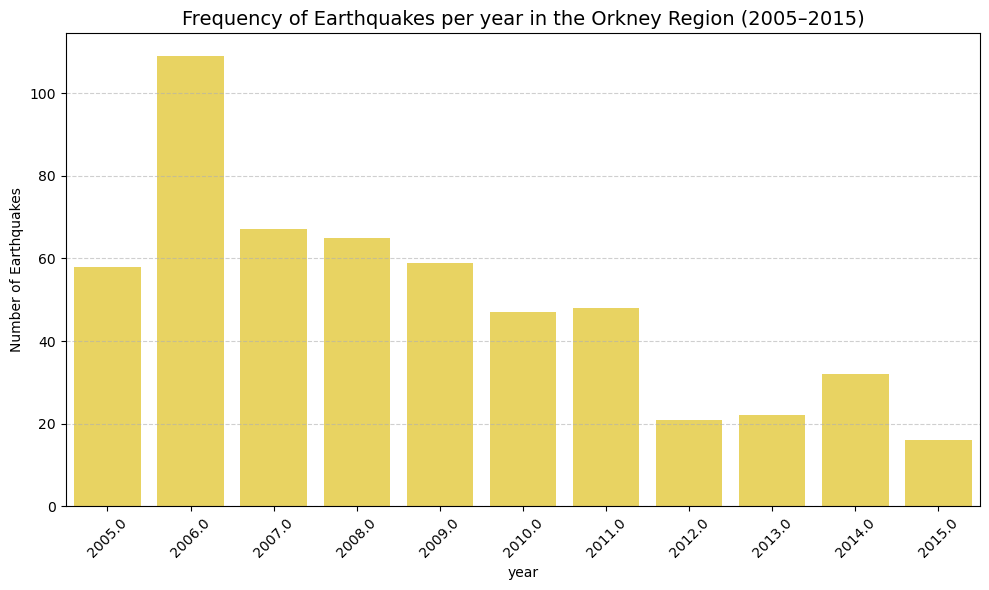

In [10]:
# Group by year
yearly_counts = orkney_df.groupby('Year').size().reset_index(name='Count')

# Plot with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=yearly_counts, x='Year', y='Count', color='gold', alpha=0.7)

# Customizations (matching original)
ax.set_xlabel('year')
ax.set_ylabel('Number of Earthquakes')
ax.set_title('Frequency of Earthquakes per year in the Orkney Region (2005–2015)', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

The code below creates a frequency line plot of earthquakes over the years in the area

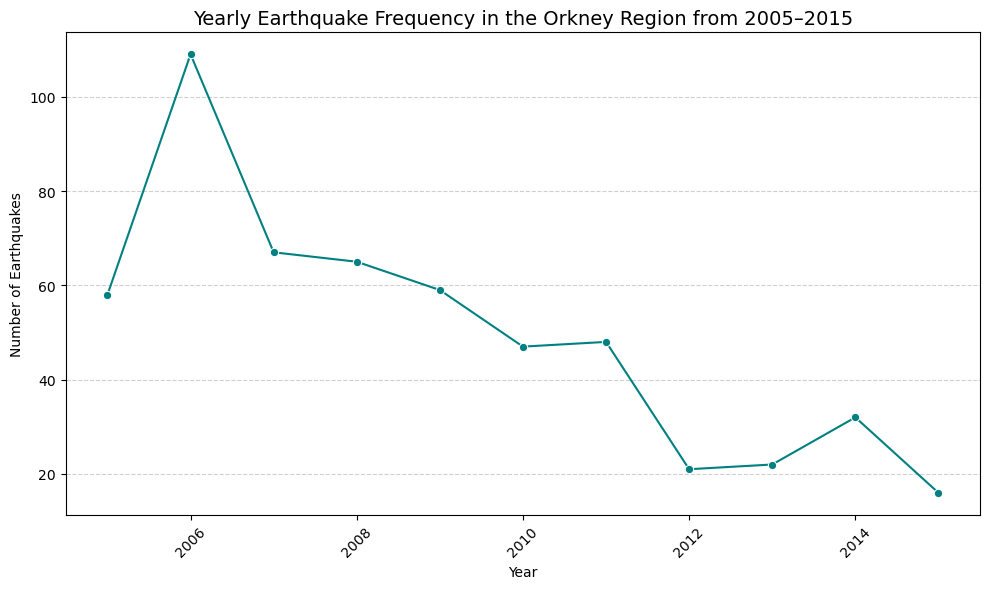

In [11]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line plot using seaborn
sns.lineplot(data=yearly_counts, x='Year', y='Count', color='teal', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Yearly Earthquake Frequency in the Orkney Region from 2005–2015', fontsize=14)

# Customize the grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Rotate x-ticks if needed
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

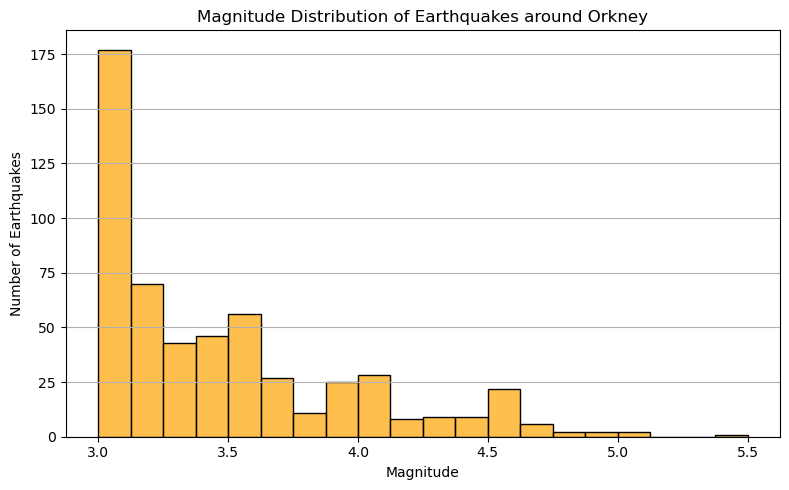

In [12]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create the histogram using seaborn
sns.histplot(data=orkney_df, x='mag', bins=20, color='orange', edgecolor='black', alpha=0.7)

# Set labels and title
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquakes')
plt.title('Magnitude Distribution of Earthquakes around Orkney')

# Customize the grid
plt.grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

The code below creates a 3D view of earthquakes and their depth 

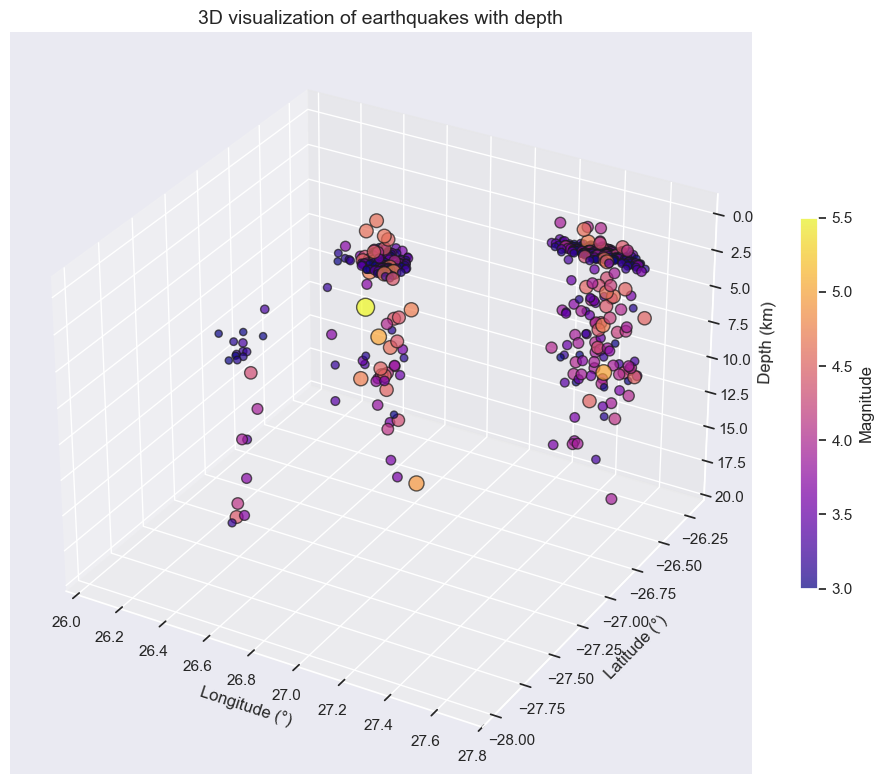

In [13]:

# Set global Seaborn theme for improved styling
sns.set_theme()

# Create a new figure and 3D axis from scratch
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Calculate point sizes
sizes = np.array(mag)**3

# Create the 3D scatter plot
sc_plot = ax.scatter(long, lat, depth, c=mag, s=sizes,
                cmap="plasma", alpha=0.7, edgecolor="k", linewidth=1)

# Customizing the axes
ax.set_title("3D visualization of earthquakes with depth", fontsize=14)
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")
ax.set_zlabel("Depth (km)")

# inverting the z axis to better display depth
ax.invert_zaxis()

# Adding and labelling the colorbar based on magnitude
c_bar = plt.colorbar(sc_plot, ax=ax, shrink=0.5, aspect=20)
c_bar.set_label("Magnitude")

# Adjust layout and display
plt.tight_layout()
plt.show()

<b> Let us now take a look at the seismograms and spectrograms for the Orkney 5.5 earthquake, which is the event with the highest magnitude </b>

150 seismic stations recorded this event, and the nearest seismic station was <B>LBTB</B> in Lobatse, Botswana, which is 2.21° (~245km) from Orkney.
More information can be obtained from NSF SAGE Wilber https://ds.iris.edu/wilber3/find_stations/4765531.
Seismic waves are normally recorded along three channels namely, <B>BHZ</B>, <B>BHN</B> and <B>BHE</B> channels

In [14]:
station = "LBTB"
location = "00"
network = "GT"
channel = "BHZ"
startt = UTCDateTime("2014-08-05T10:21:33")
endt = UTCDateTime("2014-08-05T10:26:33")


In [15]:
# Obtaining the seismogram and storing it as a stream
st = client.get_waveforms(network, station, location, channel, startt, endt)

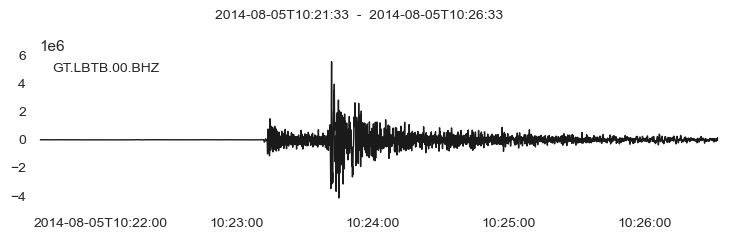

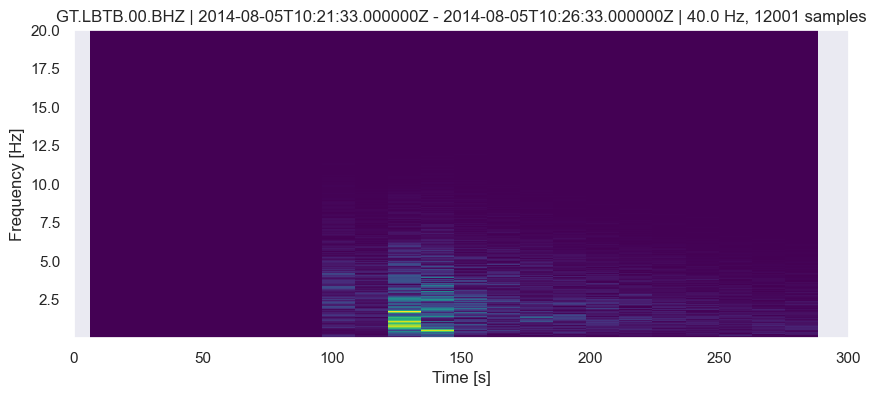

In [16]:
# Obtaining the trace and plotting both seismogram and spectrogram
tr = st[0]
tr.plot()
plt.rcParams['figure.figsize'] = (10, 4)
fig = tr.spectrogram(per_lap=.5, wlen=25)
plt.show()

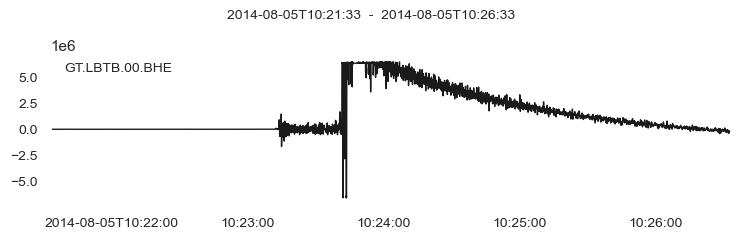

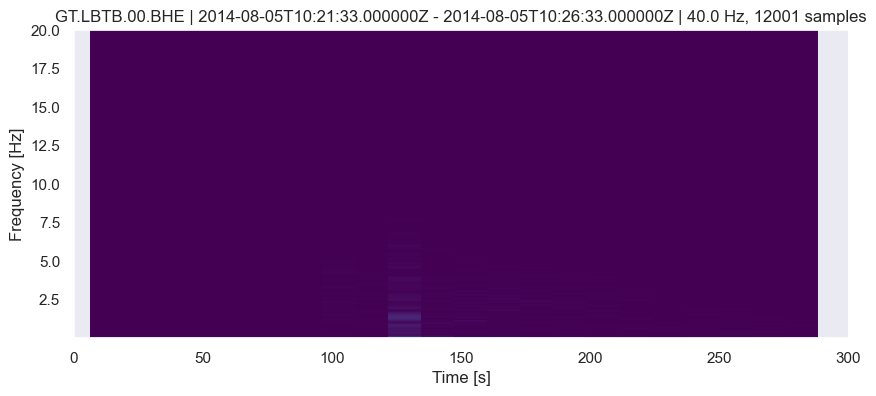

In [17]:
channel = "BHE"

st = client.get_waveforms(network, station, location, channel, startt, endt)
#getting the trace and plotting both seismogram and spectrogram
tr = st[0]
tr.plot()
plt.rcParams['figure.figsize'] = (10, 4)
fig = tr.spectrogram(show = False, per_lap=.5, wlen=25)
plt.show()

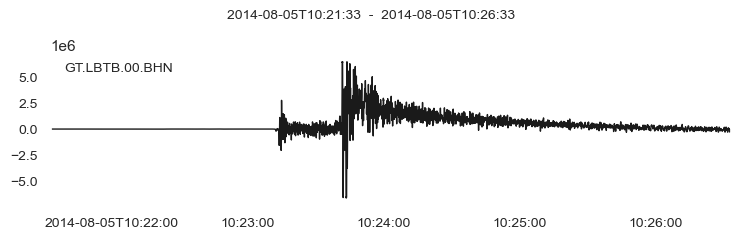

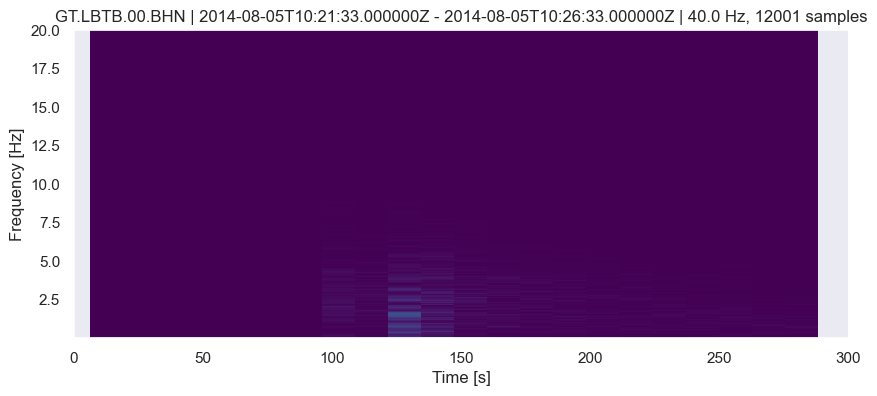

In [18]:
channel = "BHN"

st = client.get_waveforms(network, station, location, channel, startt, endt)
#getting the trace and plotting both seismogram and spectrogram
tr = st[0]
tr.plot()
plt.rcParams['figure.figsize'] = (10, 4)
fig = tr.spectrogram(per_lap=.5, wlen=25)
plt.show()

### Effects of the earthquakes on groundwater in the area

Similar to how mineral resources like gold and diamonds are important resources within the earth, <b>groundwater</b> is one of the most vital of these "hidden" resources. Groundwater is the largest reserve of freshwater, and the primary source of drinking water in Sub-Saharan Africa. While most of the earthquakes have low casualties and most evaluation of damages revolves around buildings and structural damages, seismic activities can significantly affect groundwater by causing shifts in aquifer water levels, contamination from dislodged sediments, change in aquifer discharge rates etc. This is especially so for areas with constant human-induced seismicity.

The groundwater data is obtained via <b>International Groundwater Resources Assessment Centre (IGRAC)</b> platform. IGRAC has a Global Groundwater Monitoring Network (GGMN), that collects and shares groundwater monitoring data, including groundwater levels, quality parameters, and other relevant data and metadata from national and sub-national authorities. More about IGRAC can be found here: https://un-igrac.org/

The South African Ministry of Water and Sanitation, Department of Water and Sanitation (DWS), which is a part of the GGMN, set up the Vaalkop Ptn, Williams Game Park water well (Lat: -26.969, Long: 26.722), 5.09km from Orkney. This station has groundwater level monitoring data in the area from 2004 to 2024. The data from this well has the ID <b>C2N1134</b>. You can check out IGRAC GGMN via: https://ggis.un-igrac.org/view/ggmn/

In [19]:
# The C2N1134 data is an excel.ods file, I converted it to C2N1134.xlsx through MS Excel
# Reading the C2N1134 groundwater data
orkney_gw_data = pd.read_excel("C2N1134.xlsx")
orkney_gw_data.head()

,ID,Name,Date and Time,Parameter,Value,Unit,Methodology
0,As recorded in the original database.,The name of the data point.,The date and time of the measurement or sampli...,One of the following:\n• Water depth [from the...,The numeric value of the measurement.,Unit must be either:\n• m\n• ft,Explain the methodology used to collect the da...
1,C2N1134,Vaalkop Ptn. Williams Game Park,2024-12-01 00:00:00,Water depth [from the ground surface],3.88,m,NaN
2,C2N1134,Vaalkop Ptn. Williams Game Park,2024-11-01 00:00:00,Water depth [from the ground surface],3.77,m,NaN
3,C2N1134,Vaalkop Ptn. Williams Game Park,2024-10-01 00:00:00,Water depth [from the ground surface],3.66,m,NaN
4,C2N1134,Vaalkop Ptn. Williams Game Park,2024-09-01 00:00:00,Water depth [from the ground surface],3.41,m,NaN


In [20]:
# Remove the first row (index 0) from the DataFrame
orkney_gw_data = orkney_gw_data.iloc[1:].reset_index(drop=True)

# Converting the 'Date and Time' column to a datetime object
orkney_gw_data['Date and Time'] = pd.to_datetime(orkney_gw_data['Date and Time'],
                                                 dayfirst=True,
                                                 errors='coerce')

# Checking that it has been converted to a datetime object
print(orkney_gw_data['Date and Time'].dtype)
print(orkney_gw_data['Date and Time'].head())
print(orkney_gw_data['Date and Time'].isnull().sum())


datetime64[ns]
0   2024-01-12
1   2024-01-11
2   2024-01-10
3   2024-01-09
4   2024-01-08
Name: Date and Time, dtype: datetime64[ns]
0


In [21]:
# Extracting water level measurements over the years
gwater_level = pd.DataFrame({
    'Year': orkney_gw_data['Date and Time'].dt.year,
    'Water level (m)': orkney_gw_data['Value']
})

# Setting the years to integers
gwater_level['Year'] = gwater_level['Year'].astype('Int64')

# Limiting the groundwater data to 2015 so it matches available seismic data
gwater_level = gwater_level[gwater_level['Year'] <= 2015]

# Display the first few rows
gwater_level.head()
gwater_level.tail()

,Year,Water level (m)
187,2004,1.67
188,2004,1.63
189,2004,1.91
190,2004,2.58
191,2004,2.61


### Looking for relationships between earthquakes and groundwater
**1. How did the average earthquake magnitudes affect groundwater levels over the years?**

**2. Is there any relationship between the depth of earthquakes and groundwater level fluctuations?**

The code below calculates the average groundwater level, average depth and magnitude of the earthquakes, and combines these into two new dataframes for easy plotting.

In [22]:
# Calculating yearly gwater level average
gwater_avg = gwater_level.groupby('Year')['Water level (m)'].mean().reset_index(name='avg_water_level')

# Calculating average earthquake depth per year
avg_eq_depth = orkney_df.groupby('Year')['depth (Km)'].mean().reset_index(name='avg_depth')

# merging average earthquake depth with average gwater level average
merged_eq_gwater_depth = pd.merge(gwater_avg, avg_eq_depth, on='Year')

# Calculating average earthquake magnitude per year
eqmag_avg = orkney_df.groupby('Year')['mag'].mean().reset_index(name='avg_mag')

# merging it with gwater level change
merged_gwater_eqmag = pd.merge(gwater_avg, eqmag_avg, on='Year')

print(merged_eq_gwater_depth.head())
print(merged_gwater_eqmag.head())

   Year avg_water_level  avg_depth
0  2005        1.705833   2.012069
1  2006        1.015917   2.438532
2  2007        1.771429   2.825373
3  2008        1.400667   2.458462
4  2009        2.067667   4.164407
   Year avg_water_level   avg_mag
0  2005        1.705833  3.346552
1  2006        1.015917  3.419266
2  2007        1.771429  3.343284
3  2008        1.400667  3.343077
4  2009        2.067667  3.505085


The code below creates a plot for average groundwater levels against average earthquake magnitudes

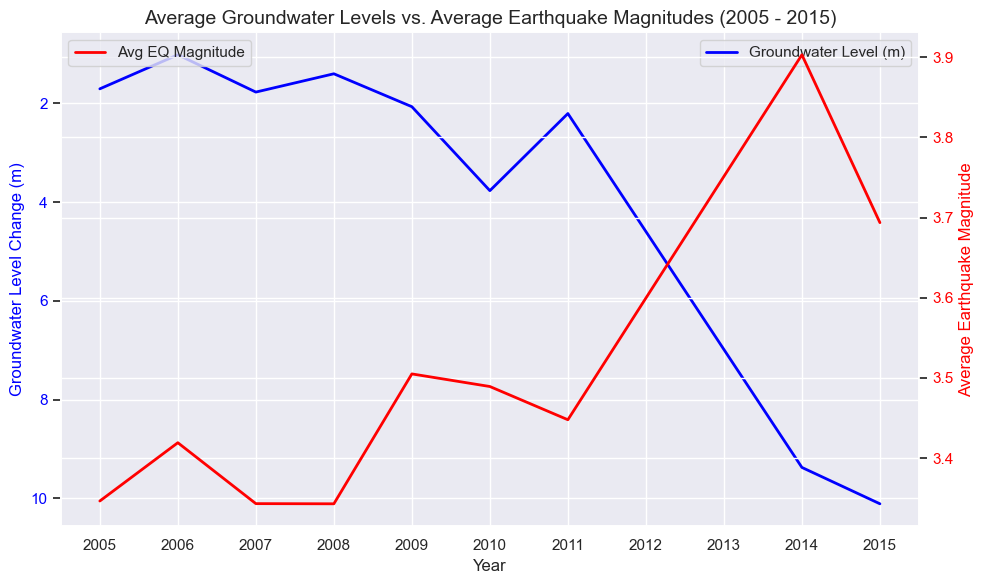

 Pearson Correlation between average gwater level and avg earthquake magnitude: 0.9081


<Figure size 1000x400 with 0 Axes>

In [23]:
# Create the plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot groundwater level on the left y-axis (blue line)
sns.lineplot(data=merged_gwater_eqmag, x='Year', y='avg_water_level', ax=ax1, color='blue', label='Groundwater Level (m)', linewidth=2) 

ax1.set_xlabel('Year')
ax1.set_ylabel('Groundwater Level Change (m)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.invert_yaxis()
ax1 = plt.gca()
ax1.xaxis.set_major_locator(MultipleLocator(1))

# Making a secondary y-axis for earthquakes (right side)
ax2 = ax1.twinx()
sns.lineplot(data=merged_gwater_eqmag, x='Year', y='avg_mag', ax=ax2, color='red', label='Avg EQ Magnitude', linewidth=2)

ax2.set_ylabel('Average Earthquake Magnitude', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend
plt.title('Average Groundwater Levels vs. Average Earthquake Magnitudes (2005 - 2015)', fontsize=14)
fig.tight_layout()  # Adjust spacing

# Show plot
plt.show()

# Optional: Save as image
plt.savefig('Avg_Eqk_Mag_vs_Gwater_level.png', dpi=300, bbox_inches='tight')

# Calculate correlation
corr_water_eqmag = merged_gwater_eqmag['avg_water_level'].corr(merged_gwater_eqmag['avg_mag'])
print(f" Pearson Correlation between average gwater level and avg earthquake magnitude: {corr_water_eqmag:.4f}")

The plot shows that average earthquake magnitudes increased steadily over time, reaching a peak in 2014 (due to the 5.5 Magnitude event), and the groundwater level depth **from the surface** also increased steadily over the years with a **Pearson correlation of 0.9081**.

**Note that the y axis for the groundwater levels have been inverted to better display increasing depth.**

The code below creates a plot for average groundwater levels against average earthquake depths

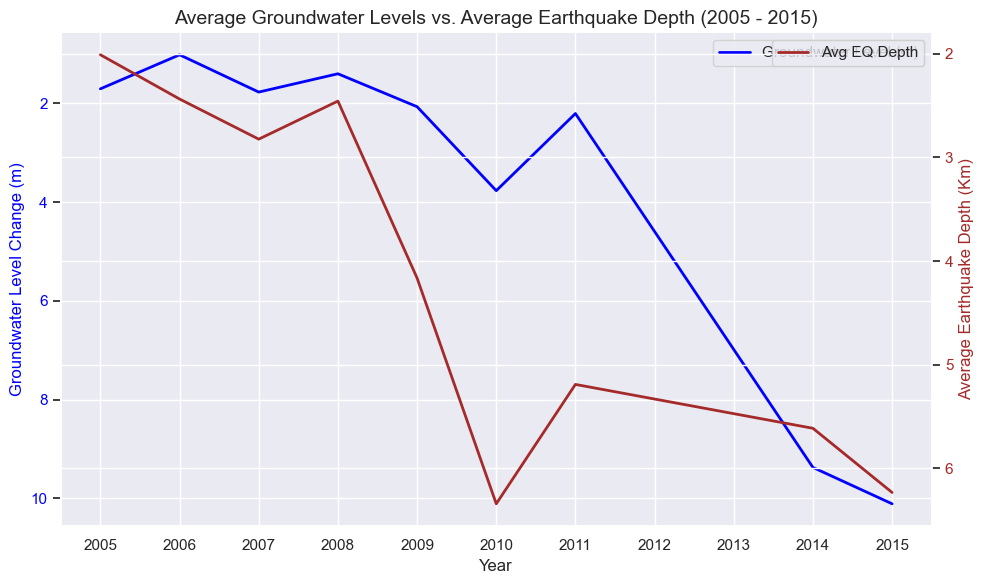

 Pearson correlation between average gwater level and avg earthquake depth: 0.7239


<Figure size 1000x400 with 0 Axes>

In [24]:
# Create the plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot groundwater level on the left y-axis (blue line)
sns.lineplot(data=merged_eq_gwater_depth, x='Year', y='avg_water_level', ax=ax1, color='blue', label='Groundwater Level (m)', linewidth=2) 

ax1.set_xlabel('Year')
ax1.set_ylabel('Groundwater Level Change (m)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.invert_yaxis()
ax1 = plt.gca()
ax1.xaxis.set_major_locator(MultipleLocator(1))

# Making a secondary y-axis for earthquake depth (right side)
ax2 = ax1.twinx()
sns.lineplot(data=merged_eq_gwater_depth, x='Year', y='avg_depth', ax=ax2, color='brown', label='Avg EQ Depth', linewidth=2)

ax2.set_ylabel('Average Earthquake Depth (Km)', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')
ax2.invert_yaxis()

# Title and legend
plt.title('Average Groundwater Levels vs. Average Earthquake Depth (2005 - 2015)', fontsize=14)
fig.tight_layout()  # Adjust spacing

# Show plot
plt.show()

# Optional: Save as image
plt.savefig('Avg_Eqk_Depth_vs_Gwater_level.png', dpi=300, bbox_inches='tight')

# Calculating the Pearson correlation
corr_water_eqdepth = merged_eq_gwater_depth['avg_water_level'].corr(merged_eq_gwater_depth['avg_depth'])
print(f" Pearson correlation between average gwater level and avg earthquake depth: {corr_water_eqdepth:.4f}")

The plot above shows that average depth the earthquakes occured increased steadily over time, and the groundwater level depth **from the surface** also increased steadily over the years, with a **Pearson correlation of 0.7239**.


### Conclusion

From the data, these mine-induced earthquakes have strong a strong correlation with change in groudwater levels in the region. The average earthquake magnitudes increased steadily while groundwater levels dropped over the years.
While the data shows these relationships, there are several other factors that could lead to the drop in groundwater levels in the area over time, such as rate of precipitation, recharge etc. Further analysis would need to be carried out to fully understand the reason for the drop in groundwater levels.

<b> While the earthquake data alone does not fully explain the reasons for decrease in groundwater levels over the years, the analysis suggests that the earthquakes, their frequency, depth of occurence, and increasing magnitudes over the years are a contributing factor. </b> 

### Acknowledgement

Special thanks to Professor Mike Brudzinski (Miami University), the TAs Nicole and Gillian, and the Earthscope Consortium for organizing the 2025 Seismology Skill Building Workshop (SSBW). The SSBW equipped me with knowledge on handling and interpreting seismic data, and applying this knowledge of seismology to help solve societal and environmental issues.

### References

1. M 5.4 - 3 km ESE of Orkney, South Africa https://earthquake.usgs.gov/earthquakes/eventpage/usb000s0b3/region-info
2. 2014 Orkney earthquake https://en.wikipedia.org/wiki/2014_Orkney_earthquake
3. IGRAC Global Groundwater Monitoring Network https://ggis.un-igrac.org/view/ggmn/
4. Robb, L. J., & Meyer, F. (1995). The Witwatersrand Basin, South Africa: Geological framework and mineralization processes. Ore Geology Reviews,          10(2), 67-94. https://doi.org/10.1016/0169-1368(95)00011-9